# <span style="color:blue">Programação Python para Ciência de Dados</span>

## <span style="color:blue">Módulo 5.1: Scikit-learn</span>

### Conteúdo da aula:
- Introdução ao aprendizado de máquina
- Aprendizado supervisionado
    - Classificação
    - Regressão
- Aprendizado não-supervionado
    - Clustering

# Introdução ao aprendizado de máquina

Aprendizado de máquina (*machine learning*, em inglês) é uma área da inteligência artificial que utiliza métodos computacionais e estatísticos para modelar o comportamento dos dados. Com isso é possível realizar tarefas como predição de interesse de compra, projeção de preços ou segmentação de clientes em grupos.

Um paradigma essêncial dentro do aprendizado de máquina é distinção entre métodos supervisionado e não-supervisionado. Uma ilustração simples de tal paradigma (que será empregada nesta aula) é:

<img src="supervision.jpg" style="width: 800px"/>

# Aprendizado supervisionado

Aprendizado supervisionado é aquele onde o objetivo principal é aprender um mapeamento entre um conjunto de atributos e uma resposta. Por exemplo:

- Dada a altura, peso e capacidade respiratória de uma pessoa descobrir a chance dela ter um problema de saúde.
- Dado o número de quartos de uma casa e seus tamanhos descobrir o preço da casa.
- Dada uma imagem de uma tomografia descobrir se um tumor é benigno ou maligno.
- Dadas as informações de uma loja predizer o número de clientes no dia seguinte

O importante é perceber que em todos os casos temos uma "resposta" a ser dada a partir de um conjunto de informações (atributos), chamada de *target*.

O processo de treinamento de um modelo consiste em apresentar diversos exemplos, cada um consistindo dos atributos $\mathbf{x}$ e da resposta $y$ associada. A partir do conjunto de exemplos $(\mathbf{x},y)$ um modelo é construido de modo a minimizar alguma medida de erro. Uma vez obtido o modelo, predição do valor de $y$ pode ser feita a partir da informação dos atributos $\mathbf{x}$ não existentes no conjunto de examplos.

## Classificação vs Regressão

O aprendizado supervisionado é divido em dois tipos principais de problemas: regressão e classificação. A diferença entre eles está relacionada ao *target*, isto é, ao tipo de resposta que o modelo deve fornecer.

Quando o *target* é uma classe, ou seja, um conjunto fixo (e finito) de valores, temos um problema de **classificação**. Por exemplo:

- Uma pessoa com certas características físicas, ``tem`` ou ``não tem`` um problema de saúde
- Dado as características de um tumor, ele é ``benigno`` ou ``maligno``
- Dadas as condições de umidade, pressão e temperatura, irá ``chover``, ``ficar nublado`` ou ``fazer sol``

Nos exemplos acima, o target é um conjunto fixo de respostas possíveis, ou seja, (``tem``, ``não tem``), (``benigno``, ``maligno``), (``chover``, ``ficar nublado``, ``fazer sol``).

Já quando o *target* é um número, temos um problema de **regressão**. Por exemplo:

- Dada as características da casa, qual o seu ``preço``?
- Da a localização e propriedades de uma loja, qual o ``número de clientes`` que a visitam?
- Data a frequência de clientes de um restaurante, ``quantos quilos`` diários de alimentos eles demandam?

Nos exemplos acima, o target é um número, que pode estar em qualquer intervalo de valores.

O modelo de aprendizado de máquina que iremos estudar nesta aula funciona tanto para regressão quanto para classificação, porem, é preciso ter em mente que nem sempre é esse o caso.

## Como medir se o modelo esta realizando predições corretas?

Uma alternativa para sabermos se o modelo está funcionando é utilizar um conjunto de dados para o qual já temos a resposta como teste. O problema é que não se deve empregar os mesmos dados para treinar e avaliar o modelo, então, o que se faz na prática, é separar uma parte do conjunto de treino, algo como 20%, para avaliar o desempenho do modelo. Perceba que separamos o conjunto de treino em um conjunto de treino e outro de teste. Em ambos conhecemos os atributos e as respostas para cada instância de dado. Esse processo é chamado de *hold out validation*, e está ilustrado na imagem a seguir:

![](treinamento-teste.png)


Uma vez tendo um conjunto de teste, podemos empregar uma métrica simples para medir o desempenho do modelo. No caso de problemas de classificação, a medida de _acurácia_ pode ser empregada. Para calcular a acurácia do modelo, basta dividir o número de acertos do modelo pelo total de instâncias no conjunto de teste.

$$ \text{acuracia} = \frac{\text{acertos}}{\text{total testes}} $$

No caso de modelos de regressão é comum utilizar o erro médio quadrático (*mean squared error*, ou MSE, em inglês). O MSE consiste na média das diferenças (ao quadrado) entre a resposta dada pelo modelo $\hat{y_i}$ e a resposta correta $y_i$.

$$ \text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2$$

## Árvore de decisão

Árvore de decisão é uma técnica que pode ser empregada para realizar tarefas de classificação ou regressão.

Considere o conjunto de dados abaixo. Nosso problema é prever se uma pessoa irá ou não praticar um esporte dado o clima do dia em questão. Que padrões conseguimos encontrar? Observe o panorama do tempo, isto é, a coluna *outlook*.

<img src="play_dataset.png" style="width: 400px"/>

Podemos observar que sempre que o *outlook* é *overcast* a pessoa irá praticar o esporte (*Yes* na coluna *Play?*). Não há nenhum outro padrão tão direto como este, mas analisando mais a fundo, percebemos que, por exemplo, sempre que está sol e com a humidade alta a pessoa não irá praticar o esporte.

Seguindo nesta linha é possível criar um conjunto de regras, que podem ser representadas através de uma **árvore de decisão**, como a seguir:

<img src="play_tree.png" style="width: 500px"/>

Desta forma é possível realizar predição para exemplos que não estavam na base de treinamento, como por exemplo: **Caso o dia esteja sol, com temperatura amena, humidade alta e ventos fortes, a pessoa irá praticar o esporte?**

Neste caso todas os nossos atribuitos foram categóricos, mas no caso de atribuitos numéricos o processo é tão simples quanto, se resumindo a: valor maior que $x$ ou valor menor que $x$.

Os detalhes de como uma árvore de decisã é constuída foge do escopo deste curso, porém o que acabou de ser apresentado fornece a intuição de como tal modelo funciona.

### Exemplo Classificação

Vamos para um exemplo simples de classificação utilizando o conjunto de dados iris

In [1]:
# Importando as bibliotecas que sempre são usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Nossa base de dados: ja disponivel no sklearn
from sklearn.datasets import load_iris

# Arvore de decisão para classificação

# Função que sapara entre conjuntos de treino e teste
from sklearn.model_selection import train_test_split

# Função que calcula a acurácia automaticamente
from sklearn.metrics import accuracy_score

# Carregando os dados da base Iris (como numpy arrays)
X, y = load_iris(return_X_y=True)

print(X.shape)
print(y.shape)

(150, 4)
(150,)
Atributo
 [[6.9 3.2 5.7 2.3]
 [7.  3.2 4.7 1.4]
 [7.9 3.8 6.4 2. ]
 [6.3 2.8 5.1 1.5]
 [4.6 3.2 1.4 0.2]
 [6.3 3.3 4.7 1.6]
 [6.3 3.3 4.7 1.6]
 [6.3 2.7 4.9 1.8]
 [5.6 3.  4.1 1.3]
 [5.9 3.  4.2 1.5]]
Respostas
 [2 1 2 2 0 1 1 2 1 1]


In [32]:
# Vamos olhar alguns exemplos

amostras = np.random.randint(0,X.shape[0],10)
print('Atributo\n',X[amostras])
print('Respostas\n',y[amostras])

Atributo
 [[5.8 2.7 5.1 1.9]
 [6.3 2.7 4.9 1.8]
 [7.  3.2 4.7 1.4]
 [5.5 2.5 4.  1.3]
 [7.4 2.8 6.1 1.9]
 [5.6 2.7 4.2 1.3]
 [4.9 2.4 3.3 1. ]
 [5.1 3.8 1.9 0.4]
 [4.9 3.6 1.4 0.1]
 [5.1 3.5 1.4 0.3]]
Respostas
 [2 2 1 1 2 1 1 0 0 0]


In [53]:
# dividindo o conjunto de treinamento em treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Vamos imprimir as dimensões
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [54]:
from sklearn.tree import DecisionTreeClassifier

# instanciando uma arvore de decisão
model = DecisionTreeClassifier()

# construindo o modelo a partir do conjunto de treino
model.fit(X_train, y_train)

# Predizendo os resultados para o conjunto de teste e salvando os resultados
y_pred = model.predict(X_test)

In [55]:
# Calculando a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)

print(acuracia)

1.0


### Exemplo Regressão

Vamos para um exemplo simples de regressão utilizando um conjuto de informações imobiliárias

In [56]:
from sklearn.datasets import load_boston

# Carregando os dados da base Boston
X, y = load_boston(return_X_y=True)

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [57]:
# Vamos olhar alguns exemplos

amostras = np.random.randint(0,X.shape[0],10)
print('Atributo\n',X[amostras])
print('Respostas\n',y[amostras])

Atributo
 [[2.63630e-01 0.00000e+00 8.56000e+00 0.00000e+00 5.20000e-01 6.22900e+00
  9.12000e+01 2.54510e+00 5.00000e+00 3.84000e+02 2.09000e+01 3.91230e+02
  1.55500e+01]
 [2.76300e-02 7.50000e+01 2.95000e+00 0.00000e+00 4.28000e-01 6.59500e+00
  2.18000e+01 5.40110e+00 3.00000e+00 2.52000e+02 1.83000e+01 3.95630e+02
  4.32000e+00]
 [6.04700e-02 0.00000e+00 2.46000e+00 0.00000e+00 4.88000e-01 6.15300e+00
  6.88000e+01 3.27970e+00 3.00000e+00 1.93000e+02 1.78000e+01 3.87110e+02
  1.31500e+01]
 [3.23700e-02 0.00000e+00 2.18000e+00 0.00000e+00 4.58000e-01 6.99800e+00
  4.58000e+01 6.06220e+00 3.00000e+00 2.22000e+02 1.87000e+01 3.94630e+02
  2.94000e+00]
 [9.17800e-02 0.00000e+00 4.05000e+00 0.00000e+00 5.10000e-01 6.41600e+00
  8.41000e+01 2.64630e+00 5.00000e+00 2.96000e+02 1.66000e+01 3.95500e+02
  9.04000e+00]
 [2.06080e-01 2.20000e+01 5.86000e+00 0.00000e+00 4.31000e-01 5.59300e+00
  7.65000e+01 7.95490e+00 7.00000e+00 3.30000e+02 1.91000e+01 3.72490e+02
  1.25000e+01]
 [2.37934e+0

In [58]:
# dividindo o conjunto de treinamento em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [59]:
from sklearn.tree import DecisionTreeRegressor

# instanciando uma árvore de decisão para regressao
model =  DecisionTreeRegressor()

# constuindo o modelo com o conjunto de treino
model.fit(X_train, y_train)

# Predizendo os resultados para o conjunto de teste e salvando os resultados
y_pred = model.predict(X_test)

In [60]:
# Vamos utilizar o MSE como métrica
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(mse)

34.37941176470588


__Pergunta:__ O valor acima mostra que o modelo é bom ou ruim?

# Aprendizado não-supervisionado

Diferente do aprendizado supervisionado, onde uma resposta deve ser predita, no aprendizado não-supervisionado o que se busca é modelar a "organização" dos dados, não uma relação atributos-resposta.

Existem diferentes tarefas de aprendizado não-supervisionado, porém, uma das mais relavantes é o agrupamento (ou *clustering*, em inglês).

**Clustering** consite em encontrar grupos que reunem instancias de dados semelhantes. Exemplos de problemas cuja solução pode ser obtida via clustering:

- Dadas suas características, quais são as instituições de ensino mais semelhantes em São Paulo
- Dadas suas características, quais empresas atuam em setores semelhantes do mercado

Perceba que não sabemos a que grupo nenhum dos exemplos pertencem, não existe um *target*. Estamos simplesmente encontrando a melhor maneira de agrupar os dados a partir de suas características (atributos).

A principal vantagem do aprendizado não-supervisionado e, consequentemente, dos métodos de  clustering é que eles não necessitam dos *targets*.

## k-Means

O k-Means (ou k-Médias, em português) é um dos métodos de clustering mais utilizado. Ele possui um funcionamento intuitivo e que apresenta resultados satisfatórios. Como o proprio nome indica **ele agrupa os dados em k grupos, com base na similaridade entre as instancias e a média do grupo**.

O primeiro passo para compreensão do k-Means é entender como os dados de uma tabela podem interpretados como pontos em um espaço multidimensional. Como ilustrado na figura abaixo,  cada coluna da uma tabela de dados pode ser associada a um eixo em um espaço multidimensional. Desta forma, cada linha corresponde a um ponto naquel espaço.

<img src="feature_space.png" style="width: 650px"/>

Dado um conjunto de pontos em um espaço multidimensional, o k-Means agrupa os dados seguindo o algoritmo abaixo:

1. k centróides (pontos) são escolhidos aleatoriamente no espaço
2. Cada instância de dado é associada ao centróide mais próximo a ela, gerando k grupos
3. O valor de cada centroide é recalculado como a média das coordenadas os pontos de um mesmo grupo
4. Os passos 2 e 3 são repetidos até que não ocorra nenhuma modificação nos grupos

A animação a seguir mostra passo a passo o processo de treinamento do algoritmo ([fonte](http://konukoii.com/blog/2017/01/15/5-min-tutorial-k-means-clustering-in-python/)). 

<img src="k_means.gif" style="width: 450px"/>

## Clustering

Text(0, 0.5, 'Atribuito 2')

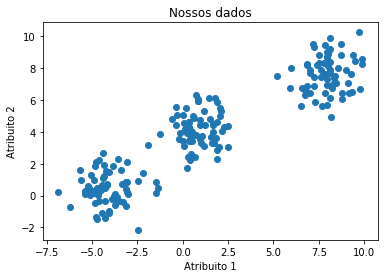

In [70]:
# Gerando uma base artificial
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=200, random_state=3)

# Mostrando a base que foi gerada
plt.scatter(X[:,0], X[:, 1])
plt.title('Nossos dados')
plt.xlabel('Atribuito 1')
plt.ylabel('Atribuito 2')

In [74]:
from sklearn.cluster import KMeans

# Instanciando K-Means com 2 grupos
model = KMeans(n_clusters=2)

# Constuindo o modelo
model.fit(X)

# Obtendo o grupo associado a cada instancia
clusters = model.predict(X)
print(clusters[:10])

[1 1 0 1 0 1 1 1 1 1]


Text(0, 0.5, 'Atribuito 2')

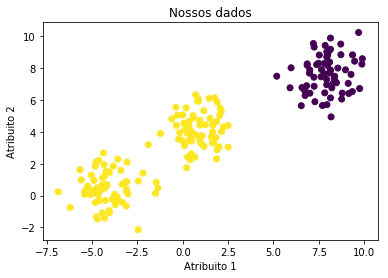

In [75]:
# Mostrando clusters obtidos
plt.scatter(X[:,0], X[:, 1], c=clusters)
plt.title('Nossos dados')
plt.xlabel('Atribuito 1')
plt.ylabel('Atribuito 2')

Mas será que o número certo de grupos é dois? Vamos ver como ficaria com a divisão em três clusters:

Text(0, 0.5, 'Atribuito 2')

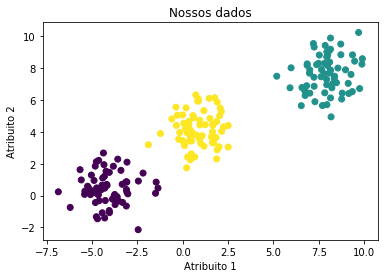

In [76]:
# Vamos usar o K-Means indicando que queremos dividir em 3 grupos
model = KMeans(n_clusters=3)

# Treinando o modelo
model.fit(X)

# Obtendo o grupo associado a cada instancia
clusters = model.predict(X)

# Mostrando a base com os clusters designados
plt.scatter(X[:,0], X[:, 1], c=clusters)
plt.title('Nossos dados')
plt.xlabel('Atribuito 1')
plt.ylabel('Atribuito 2')

Nesse caso escolhemos o número de clusters baseados na intuição visual, já que o problema só possui duas variáveis. Mas na prática é necessário utilizar outras técnicas, como o [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering))